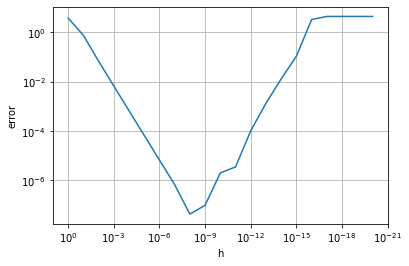

In [3]:
# a(i)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = lambda x:np.exp(np.cos(np.pi*x**2))
x = 1 / (2**0.5)
k = np.arange(21)
h = 0.1**k
dydx = (f(x + h) - f(x))/h
error = np.abs(dydx - (np.pi*-2**0.5))
plt.loglog(h,error)
plt.gca().invert_xaxis() # plots smaller h going to the right
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.show()

# roughly h = 1E-8

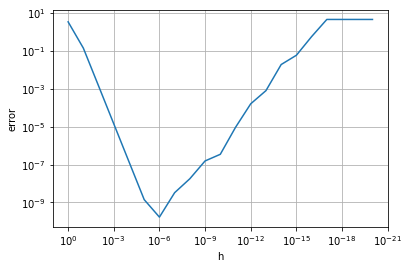

In [14]:
# a(ii)

dydx = (f(x + h) - f(x - h))/(2*h)
error = np.abs(dydx - (np.pi*-2**0.5))
plt.loglog(h,error)
plt.gca().invert_xaxis() # plots smaller h going to the right
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.show()

# roughly h = 1E-6

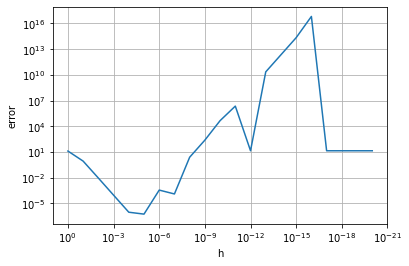

In [4]:
# a(iii)

d2ydx2 = (f(x + h) - 2*f(x) + f(x - h))/(h**2)
error = np.abs(d2ydx2 - (2*np.pi*(np.pi - 1)))
plt.loglog(h,error)
plt.gca().invert_xaxis() # plots smaller h going to the right
plt.xlabel('h')
plt.ylabel('error')
plt.grid()
plt.show()

# h = 1E-4 looks to be the best h for minimising error, 
# which has a magnitude of less than 1E-5

In [5]:
# b(i) trapezoidal rule
f = lambda x:x * np.exp(-(x**0.5))
a = 0
b = 10
n = [10, 20, 40, 80, 160]
for i in n:
    h = (b-a)/i
    x = np.linspace(a, b, i+1)
    y = f(x)
    trape = (y[1:-1]).sum()*h + h/2*(y[0] + y[-1])
    print("n = ", i, ", F(x) = ", trape)

# F(x) approx equals 4.668

n =  10 , F(x) =  4.607872940794084
n =  20 , F(x) =  4.651934278080257
n =  40 , F(x) =  4.664330479310646
n =  80 , F(x) =  4.667686103287531
n =  160 , F(x) =  4.668571606382886


In [6]:
#b(ii) simpsons rule
n = [10, 20, 40, 80, 160]
for i in n:
    h = (b-a)/i
    x = np.linspace(a, b, i+1)
    y = f(x)
    simps = h/3*(y[0]+y[-1])+4*h/3*y[1::2].sum()+2*h/3*y[2:-1:2].sum()
    print("n = ", i, ", F(x) = ", simps)

# I can comfortably estimate 3 dp, as by n = 40 and 
# onwards, 4.668 becomes a good approximation
# Beyond that, the highest I would truncate it is 
# probably at 4 as n=80 and 160 are similar enough

n =  10 , F(x) =  4.657102287466295
n =  20 , F(x) =  4.666621390508981
n =  40 , F(x) =  4.668462546387442
n =  80 , F(x) =  4.668804644613161
n =  160 , F(x) =  4.668866774081337


In [7]:
#b(iii)
from scipy.integrate import quad
b = [10, 100, 1000]
for i in b:
    result = quad(f, 0, i)
    print(result)
# Resulrs appear to converge to 12
print("Integrating over pos inf: ", quad(f, 0, np.inf))

(4.668880328350932, 7.285905212484067e-11)
(11.875967391881685, 1.65368627236262e-07)
(11.999999998713985, 1.934958504534734e-08)
Integrating over pos inf:  (12.000000000094914, 1.3641666968026385e-07)
